In [2]:
import numpy as np
import cs_vqe as c
import ast
import os
from tqdm import tqdm

import cs_vqe_with_LCU as c_LCU

In [3]:
from tqdm.notebook import tqdm

In [4]:
# with open("hamiltonians.txt", 'r') as input_file:
#     hamiltonians = ast.literal_eval(input_file.read())
    
working_dir = os.getcwd()
data_dir = os.path.join(working_dir, 'data')
data_hamiltonians_file = os.path.join(data_dir, 'hamiltonians.txt')


with open(data_hamiltonians_file, 'r') as input_file:
    hamiltonians = ast.literal_eval(input_file.read())

In [5]:
for key in hamiltonians.keys():
    print(f"{key: <25}     n_qubits:  {hamiltonians[key][1]:<5.0f}")

H2-S1_STO-3G_singlet          n_qubits:  18   
C1-O1_STO-3G_singlet          n_qubits:  16   
H1-Cl1_STO-3G_singlet         n_qubits:  16   
H1-Na1_STO-3G_singlet         n_qubits:  16   
H2-Mg1_STO-3G_singlet         n_qubits:  17   
H1-F1_3-21G_singlet           n_qubits:  18   
H1-Li1_3-21G_singlet          n_qubits:  18   
Be1_STO-3G_singlet            n_qubits:  5    
H1-F1_STO-3G_singlet          n_qubits:  8    
H1-Li1_STO-3G_singlet         n_qubits:  8    
Ar1_STO-3G_singlet            n_qubits:  13   
F2_STO-3G_singlet             n_qubits:  15   
H1-O1_STO-3G_singlet          n_qubits:  8    
H2-Be1_STO-3G_singlet         n_qubits:  9    
H2-O1_STO-3G_singlet          n_qubits:  10   
H2_3-21G_singlet              n_qubits:  5    
H2_6-31G_singlet              n_qubits:  5    
H3-N1_STO-3G_singlet          n_qubits:  13   
H4-C1_STO-3G_singlet          n_qubits:  14   
Mg1_STO-3G_singlet            n_qubits:  13   
N2_STO-3G_singlet             n_qubits:  15   
Ne1_STO-3G_si

In [12]:
molecules_and_qubits = [(mol_key, hamiltonians[mol_key][1])for mol_key in hamiltonians]
xx = sorted(molecules_and_qubits, key= lambda x: x[1])

In [19]:
for i in range(1,30):
    

29

In [20]:
len(list(range(1,30)))

29

In [18]:
xx[16][0]

'H4-C1_STO-3G_singlet'

In [5]:
speciesname = 'H1-F1_STO-3G_singlet'

encoding = hamiltonians[speciesname][0] # in this dataset, always 'JW' for Jordan-Wigner, but leaves room for trying Bravyi-Kitaev as well
n_qubits = hamiltonians[speciesname][1] # number of qubits (all of these Hamiltonians have been tapered for molecular symmetries)
ham = hamiltonians[speciesname][2] # full Hamiltonian
ham_noncon = hamiltonians[speciesname][3] # noncontextual part of Hamiltonian, found by greedy DFS
true_gs = hamiltonians[speciesname][4] # ground state energy of full Hamiltonian (in Hartree)
gs_noncon = hamiltonians[speciesname][5] # list containing information about noncontextual ground state: zeroth entry is ground state energy of noncontextual part of Hamiltonian


In [6]:
data_csvqe_results_file = os.path.join(data_dir, 'csvqe_results.txt')
with open(data_csvqe_results_file, 'r') as input_file:
    csvqe_results = ast.literal_eval(input_file.read())

In [7]:
for key in hamiltonians:
    if key not in csvqe_results.keys():
        print(key)

Ar1_STO-3G_singlet
Ne1_STO-3G_singlet
H1-He1_STO-3G_singlet


In [8]:
N_index=0
check_reduction=False

csvqe_LCU_output={}
csvqe_standard_output={}

for mol_key in tqdm(hamiltonians.keys(), ascii=True, desc='running CS-VQE calcuations'):

    if mol_key not in csvqe_results.keys():
        continue
    
    N_Qubits= hamiltonians[mol_key][1]
    
    if N_Qubits>7:
        continue
    else:
        
#         gs_noncon = hamiltonians[mol_key][5]
#         model = [gs_noncon[1], gs_noncon[2], gs_noncon[3]]
#         fn_form = gs_noncon[4]

        ham = hamiltonians[mol_key][2] # full Hamiltonian
        true_gs = hamiltonians[mol_key][4] # ground state energy of full Hamiltonian (in Hartree)
        ham_noncon = hamiltonians[mol_key][3]  # noncontextual part of Hamiltonian, found by greedy DFS
        
        new_way = c_LCU.csvqe_approximations_heuristic_LCU(ham,
                                   ham_noncon,
                                   N_Qubits, 
                                   true_gs, 
                                   N_index, 
                                   check_reduction=check_reduction)
        
        old_way = c.csvqe_approximations_heuristic(ham,
                                   ham_noncon,
                                   N_Qubits, 
                                   true_gs)
        
        csvqe_LCU_output[mol_key] = new_way
        csvqe_standard_output[mol_key] = old_way

In [9]:
mol_key = 'Be1_STO-3G_singlet'

fci_energy = csvqe_LCU_output[mol_key][0]

# LCU
energy = csvqe_LCU_output[mol_key][1]
error = csvqe_LCU_output[mol_key][2] # fci - energy
best_order = csvqe_LCU_output[mol_key][3]

# standard
energy_std = csvqe_standard_output[mol_key][1]
error_std = csvqe_standard_output[mol_key][2] # fci - energy
best_order_std = csvqe_standard_output[mol_key][3]


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

#################################################
Be1_STO-3G_singlet            n_qubits:  5    


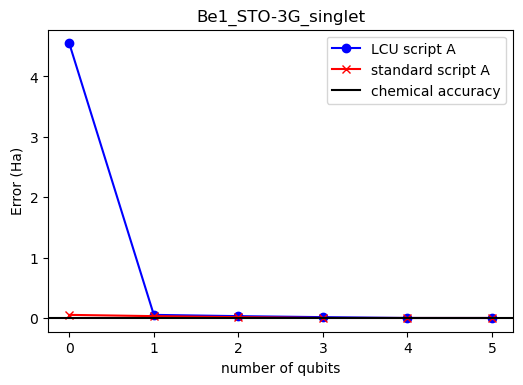

################################################# 
 

#################################################
H2_3-21G_singlet              n_qubits:  5    


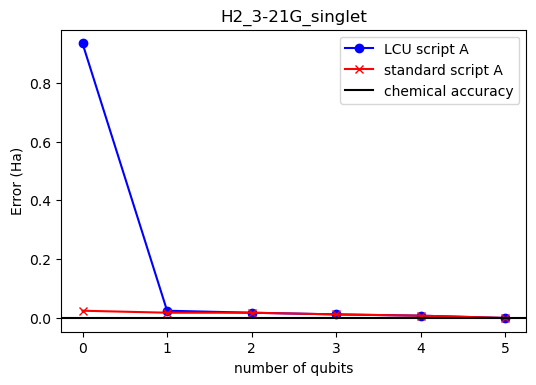

################################################# 
 

#################################################
H2_6-31G_singlet              n_qubits:  5    


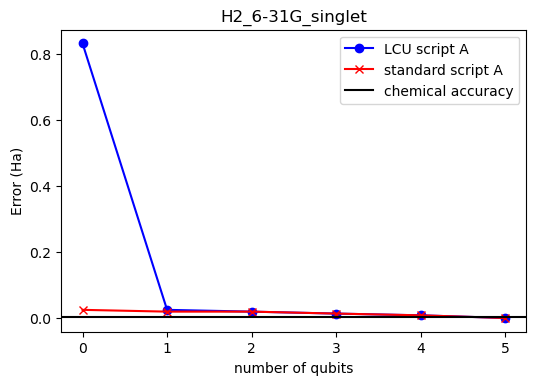

################################################# 
 

#################################################
H3_STO-3G_singlet_1+          n_qubits:  3    


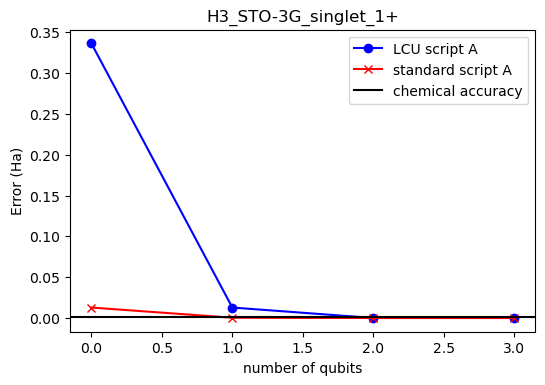

################################################# 
 

#################################################
H1-He1_3-21G_singlet_1+       n_qubits:  6    


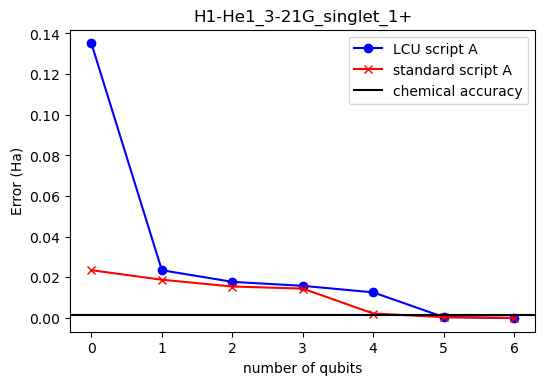

################################################# 
 



In [11]:
for mol_key in csvqe_LCU_output.keys():
    
    
    N_Qubits= hamiltonians[mol_key][1]
    
    ### RESULTS
    fci_energy = csvqe_LCU_output[mol_key][0]
    
#     energy_LCU = csvqe_LCU_output[mol_key][1]
    error_LCU = csvqe_LCU_output[mol_key][2] # fci - energy
    best_order_LCU = csvqe_LCU_output[mol_key][3]
    
#     energy_std = csvqe_LCU_output[mol_key][1]
    error_std = csvqe_standard_output[mol_key][2] # fci - energy
    best_order_std = csvqe_standard_output[mol_key][3]
    
    
#     x_qubits = list(range(N_Qubits+1)) #+1 for no qubit case!
    x_qubits_LCU = list(range(len(error_LCU)))
    x_qubits_std = list(range(len(error_std)))
    
    print('#################################################')
    print(f"{mol_key: <25}     n_qubits:  {N_Qubits:<5.0f}")

    plt.figure(dpi=100)
    plt.plot(x_qubits_LCU, error_LCU, marker='o', color='b', label='LCU script A')
    plt.plot(x_qubits_std, error_std, marker='x', color='r', label='standard script A')
    plt.xlabel('number of qubits')
    plt.ylabel('Error (Ha)')
    
    plt.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
    
    plt.title(mol_key)
    plt.legend()
    plt.show()
    print('################################################# \n \n')

In [12]:
list(gs_noncon[3])

[['ZIIIIIII',
  'IZIIIIII',
  'IIIZIIII',
  'IIIIZIII',
  'IIIIIZII',
  'IIIIIIZI',
  'IIIIIIIZ'],
 ['IIXZZZZZ', 'IIZIIIII'],
 {'IIIIIIII': [[], [], 1],
  'IIIIIIIZ': [['IIIIIIIZ'], [], 1],
  'IIIIIIZI': [['IIIIIIZI'], [], 1],
  'IZIIIIII': [['IZIIIIII'], [], 1],
  'ZIIIIIII': [['ZIIIIIII'], [], 1],
  'IIIIIZII': [['IIIIIZII'], [], 1],
  'IIIIZIII': [['IIIIZIII'], [], 1],
  'IIIZIIII': [['IIIZIIII'], [], 1],
  'IIZIIIII': [[], ['IIZIIIII'], 1],
  'IIIIIIZZ': [['IIIIIIZI', 'IIIIIIIZ'], [], 1],
  'ZZIZIZIZ': [['ZIIIIIII', 'IZIIIIII', 'IIIZIIII', 'IIIIIZII', 'IIIIIIIZ'],
   [],
   1],
  'ZZZIZIZI': [['ZIIIIIII', 'IZIIIIII', 'IIIIZIII', 'IIIIIIZI'],
   ['IIZIIIII'],
   1],
  'ZZIIIIII': [['ZIIIIIII', 'IZIIIIII'], [], 1],
  'IZIIIIIZ': [['IZIIIIII', 'IIIIIIIZ'], [], 1],
  'IZIIIIZI': [['IZIIIIII', 'IIIIIIZI'], [], 1],
  'ZIIIIIIZ': [['ZIIIIIII', 'IIIIIIIZ'], [], 1],
  'ZIIIIIZI': [['ZIIIIIII', 'IIIIIIZI'], [], 1],
  'IIXZZZZZ': [[], ['IIXZZZZZ'], 1],
  'ZZXZIZIZ': [['ZIIIIIII', 'IZIIIIII', 

In [13]:
from copy import deepcopy

In [14]:
N_index=0
check_reduction=True

for mol_key in csvqe_LCU_output.keys():
    
    
    ham = hamiltonians[mol_key][2] # full Hamiltonian
    gs_noncon = hamiltonians[mol_key][5]
    model = list(gs_noncon[3])
    fn_form = gs_noncon[4]
    N_Qubits= hamiltonians[mol_key][1]
    
    ground_state_params = [list(gs_noncon[1]), list(gs_noncon[2])]
    
    
    ## LCU
    best_order_LCU = deepcopy(csvqe_LCU_output[mol_key][3])
    
    reduced_H_LCU_list = c_LCU.get_reduced_hamiltonians_LCU(ham, # Con_H,
                               model,
                               fn_form,
                               ground_state_params,
                               best_order_LCU, 
                               N_Qubits,
                               N_index, 
                               check_reduction=check_reduction)
    
    
    ### Standard
    best_order_std = deepcopy(csvqe_standard_output[mol_key][3]) 
    
    reduced_H_standard_list = c.get_reduced_hamiltonians(ham, # Con_H,
                           model,
                           fn_form,
                           ground_state_params,
                           best_order_std)
    
    
    for H_LCU, H_std in zip(reduced_H_LCU_list, reduced_H_standard_list):
        print(f"standard: {len(H_std): <5}     LCU:  {len(H_LCU):<5.0f}")
    print('')
    


standard: 1         LCU:  1    
standard: 3         LCU:  3    
standard: 10        LCU:  10   
standard: 20        LCU:  30   
standard: 54        LCU:  54   
standard: 146       LCU:  146  

standard: 1         LCU:  1    
standard: 3         LCU:  3    
standard: 10        LCU:  10   
standard: 34        LCU:  34   
standard: 62        LCU:  62   
standard: 126       LCU:  126  

standard: 1         LCU:  1    
standard: 3         LCU:  3    
standard: 10        LCU:  10   
standard: 34        LCU:  34   
standard: 62        LCU:  62   
standard: 126       LCU:  126  

standard: 1         LCU:  1    
standard: 3         LCU:  3    
standard: 10        LCU:  10   
standard: 35        LCU:  31   

standard: 1         LCU:  1    
standard: 3         LCU:  3    
standard: 10        LCU:  10   
standard: 34        LCU:  34   
standard: 84        LCU:  84   
standard: 155       LCU:  155  
standard: 321       LCU:  321  



In [15]:
## checking with only CONTEXTUAL PART rather than full H in reduction!

N_index=0
check_reduction=True

for mol_key in csvqe_LCU_output.keys():
    
    
    ham = hamiltonians[mol_key][2] # full Hamiltonian
    ham_noncon = hamiltonians[mol_key][3]  # noncontextual part of Hamiltonian, found by greedy DFS
    
    
    ham_CON = {}
    for P in ham:
        if P in ham_noncon:
            continue
        else:
            ham_CON[P]=ham[P]
    
    
    gs_noncon = hamiltonians[mol_key][5]
    model = list(gs_noncon[3])
    fn_form = gs_noncon[4]
    N_Qubits= hamiltonians[mol_key][1]
       
    ground_state_params = [list(gs_noncon[1]), list(gs_noncon[2])]
    
    
    Energy_function = c.energy_function(fn_form)
    non_con_GS = Energy_function(*gs_noncon[1], *gs_noncon[2]) #<-- needs to be added to results!
    
    ## LCU
    best_order_LCU = deepcopy(csvqe_LCU_output[mol_key][3])
    
    reduced_H_LCU_list = c_LCU.get_reduced_hamiltonians_LCU(ham_CON, #<-- CON PART ONLY
                               model,
                               fn_form,
                               ground_state_params,
                               best_order_LCU, 
                               N_Qubits,
                               N_index, 
                               check_reduction=check_reduction)
    
    
    ### Standard
    best_order_std = deepcopy(csvqe_standard_output[mol_key][3]) 
    
    reduced_H_standard_list = c.get_reduced_hamiltonians(ham_CON, #<-- CON PART ONLY
                           model,
                           fn_form,
                           ground_state_params,
                           best_order_std)
    
    
    for H_LCU, H_std in zip(reduced_H_LCU_list, reduced_H_standard_list):
        print(f"standard: {len(H_std): <5}     LCU:  {len(H_LCU):<5.0f}")
    print('')


standard: 0         LCU:  0    
standard: 1         LCU:  0    
standard: 6         LCU:  4    
standard: 12        LCU:  18   
standard: 30        LCU:  30   
standard: 98        LCU:  98   

standard: 0         LCU:  0    
standard: 1         LCU:  0    
standard: 4         LCU:  4    
standard: 22        LCU:  22   
standard: 42        LCU:  42   
standard: 96        LCU:  96   

standard: 0         LCU:  0    
standard: 1         LCU:  0    
standard: 4         LCU:  4    
standard: 22        LCU:  22   
standard: 42        LCU:  42   
standard: 96        LCU:  96   

standard: 0         LCU:  0    
standard: 1         LCU:  0    
standard: 4         LCU:  4    
standard: 23        LCU:  19   

standard: 0         LCU:  0    
standard: 1         LCU:  0    
standard: 6         LCU:  4    
standard: 26        LCU:  22   
standard: 68        LCU:  60   
standard: 122       LCU:  122  
standard: 278       LCU:  278  



In [16]:
import cirq

In [17]:
qubit = cirq.LineQubit(0)
circuit = cirq.Circuit(
cirq.H.on(qubit)
)

In [18]:
Ry = cirq.ry(-np.pi/2)._unitary_()
X = cirq.X._unitary_()

Ry.dot(X)

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [19]:
cirq.H._unitary_()

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [20]:
np.allclose(Ry.dot(X), cirq.H._unitary_())

True

In [21]:
cirq.YPowGate(exponent=0.5)._unitary_()

array([[ 0.5+0.5j, -0.5-0.5j],
       [ 0.5+0.5j,  0.5+0.5j]])

In [22]:
cirq.ry(-np.pi/2)._unitary_()

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j]])

In [23]:
cirq.Circuit(cirq.decompose(circuit))

0: ───Y^0.5───X───

In [24]:
cirq.X._unitary_()

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [25]:
np.allclose(cirq.X._unitary_(), cirq.rx(np.pi)._unitary_()) 

False

In [26]:
cirq.X._unitary_().dot(cirq.rx(np.pi/2)._unitary_())

array([[0.        -0.70710678j, 0.70710678+0.j        ],
       [0.70710678+0.j        , 0.        -0.70710678j]])

In [27]:
cirq.X._unitary_()

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [28]:
cirq.rx(np.pi/2)._unitary_()

array([[0.70710678+0.j        , 0.        -0.70710678j],
       [0.        -0.70710678j, 0.70710678+0.j        ]])

In [29]:
np.dot(cirq.ry(-np.pi/2)._unitary_(), cirq.X._unitary_().dot(cirq.rx(np.pi/2)._unitary_()))

array([[ 0.5-0.5j,  0.5-0.5j],
       [ 0.5+0.5j, -0.5-0.5j]])

In [30]:
qubit = cirq.LineQubit(0)
circuit = cirq.Circuit(
cirq.ry(-np.pi/2).on(qubit),
cirq.X.on(qubit),
cirq.rx(np.pi/2).on(qubit),
)
circuit

0: ───Ry(-0.5π)───X───Rx(0.5π)───

In [31]:
cirq.merge_single_qubit_gates_into_phased_x_z(circuit)
cirq.Circuit(cirq.decompose(circuit))

0: ───Z───X^0.5───Z───S───

In [32]:
cirq.XPowGate(exponent=0.5)._unitary_()

circuit = cirq.Circuit(
cirq.XPowGate(exponent=0.5).on(qubit),
)
circuit.unitary()

array([[0.5+0.5j, 0.5-0.5j],
       [0.5-0.5j, 0.5+0.5j]])

In [33]:
cirq.rx(np.pi/4)._unitary_()

array([[0.92387953+0.j        , 0.        -0.38268343j],
       [0.        -0.38268343j, 0.92387953+0.j        ]])

In [34]:
# from scipy.linalg import expm
# expm(-1j*cirq.X._unitary_() * np.pi)

In [35]:
cirq.rx(3*np.pi)._unitary_()

array([[0.+0.j, 0.+1.j],
       [0.+1.j, 0.+0.j]])

In [36]:
cirq.rx(0)._unitary_()

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [37]:
cirq.XPowGate(exponent=0.5)._unitary_()

array([[0.5+0.5j, 0.5-0.5j],
       [0.5-0.5j, 0.5+0.5j]])

In [38]:
cirq.ry(np.pi*3)._unitary_()

array([[ 0.+0.j,  1.+0.j],
       [-1.+0.j,  0.+0.j]])

In [39]:
random_U.shape

NameError: name 'random_U' is not defined

In [ ]:
from scipy.stats import unitary_group
N=4

random_U = unitary_group.rvs(2**N)
random_U= random_U/np.trace(random_U)

my_gate = cirq.MatrixGate(random_U)


qubits = list(cirq.LineQubit.range(N))
circuit = cirq.Circuit(
my_gate.on(*qubits),
)


In [ ]:
desired_matrix = cirq.testing.random_unitary(dim=4)
desired_matrix = unitary_group.rvs(4)

synthesized_operations = cirq.two_qubit_matrix_to_operations(
    cirq.LineQubit(0),
    cirq.LineQubit(1),
    desired_matrix,
    allow_partial_czs=False,
)
circuit = cirq.Circuit(synthesized_operations)


In [ ]:
sum(np.abs(desired_matrix[:,0])**2)

In [ ]:
from quchem.Qcircuit.Circuit_functions_to_create_arb_state import intialization_circuit

G_circ = intialization_circuit(desired_matrix[:,0],
                             0,
                             1,
                             check_circuit=False)
G_circ

In [ ]:
G_circ.final_state_vector()

In [ ]:
desired_matrix[:,0]

In [ ]:
circuit.final_state_vector()

In [ ]:
desired_matrix

In [ ]:
circuit.unitary()

In [ ]:
list(G_circ.all_operations())

In [ ]:
XX.qubits

In [ ]:
qubit_list = cirq.LineQubit.range(2):
    
    for single_qubit in qubit_list:
        

In [ ]:
type(XX)

In [ ]:
def recursive_single_qubit_simplification(qubitID, circuit_op_list):
    for op in oplist:
        if isinstance(op, cirq.ops.pauli_string.SingleQubitPauliStringGateOperation):
            